[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [4]:
import numpy as np

np.random.seed(12345)
data_stream = np.concatenate(
    (np.random.randint(2, size=1000), np.random.randint(8, size=1000))
)

In [2]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "17"

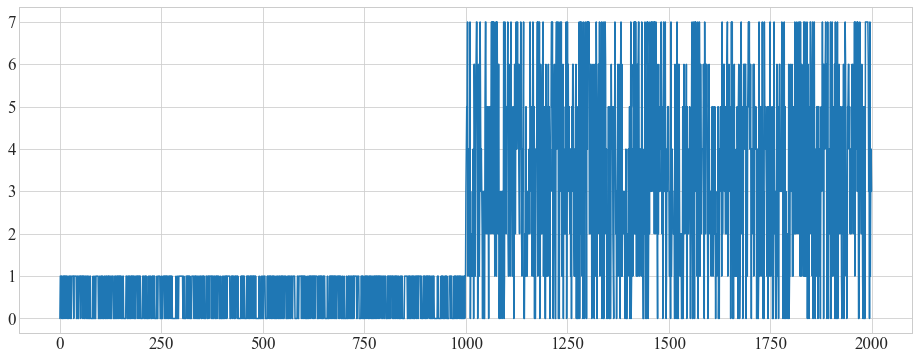

In [5]:
plt.figure(figsize=(16, 6))
plt.plot(data_stream)

In [6]:
def perform_test(drift_detector, data_stream):
    detected_indices = []
    for i, val in enumerate(data_stream):
        in_drift, in_warning = drift_detector.update(val)
        if in_drift:
            detected_indices.append(i)
    return detected_indices

<ipython-input-41-93a14a908cd0>:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(


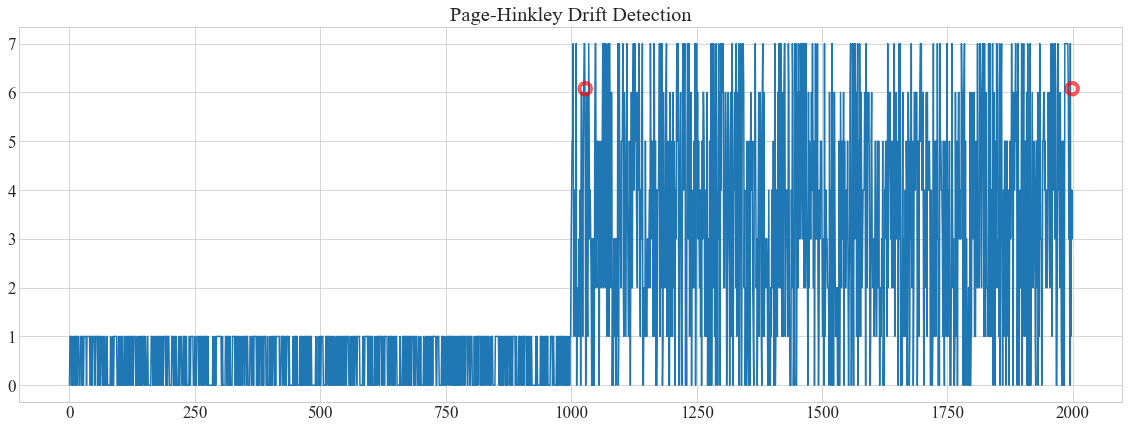

In [41]:
import matplotlib.pyplot as plt


def show_drift(data_stream, indices):
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(data_stream)
    ax.plot(
        indices,
        data_stream[indices],
        "ro",
        alpha=0.6,
        marker=r'$\circ$',
        markersize=22,
        linewidth=4
    )
    plt.tight_layout()


detected_indices = perform_test(PageHinkley(), data_stream)
show_drift(data_stream, detected_indices)
plt.title("Page-Hinkley Drift Detection");

<ipython-input-41-93a14a908cd0>:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(


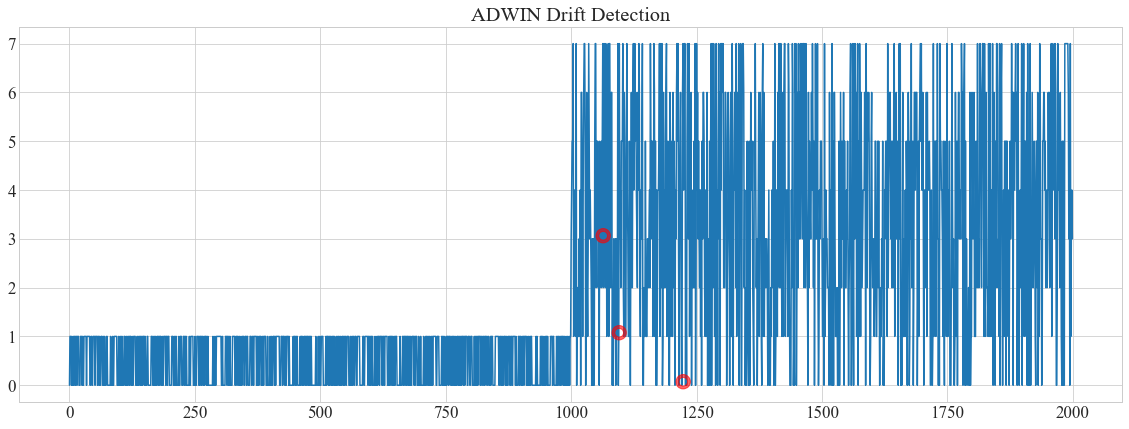

In [42]:
from river.drift import ADWIN, PageHinkley

detected_indices = perform_test(ADWIN(), data_stream)
show_drift(data_stream, detected_indices)
plt.title("ADWIN Drift Detection");